In [26]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from app import usr,count

In [27]:
usr, count

('SrBachchan', 3000)

In [28]:
main_out_dir = 'images'
out = os.path.join(main_out_dir, '{}_{}'.format(usr,count))

if not os.path.exists(main_out_dir):
    os.mkdir(main_out_dir)
    
if not os.path.exists(out):
    os.mkdir(out)

In [29]:
df = pd.read_csv('data/{}-{}.csv'.format(usr,count))
df.dropna(inplace = True)
len(df)

2690

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
len(df)

2690

In [32]:
df.isnull().sum()

Sno           0
Tweet         0
Date          0
Likes         0
RTs           0
Sentiments    0
dtype: int64

In [33]:
positive_tweets = df[df['Sentiments'] == 1]['Tweet'].tolist()
negative_tweets = df[df['Sentiments'] == -1]['Tweet'].tolist()
neutral_tweets = df[df['Sentiments'] == 0]['Tweet'].tolist()

In [47]:
def get_words(all_tweets):
    all_words = set()
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        tags = blob.tags
        for tag in tags:
            if tag[1][0] in ['J']:
                all_words.add(tag[0])
    return all_words

In [48]:
positive_words = get_words(positive_tweets)
negative_words = get_words(negative_tweets)
neutral_words = get_words(neutral_tweets)


In [49]:
print(len(positive_words))
print(len(negative_words))
print(len(neutral_words))

285
98
140


In [50]:
def word_cloud_show(words,mask, filename):
    stopwords = set(STOPWORDS)
    cloud = WordCloud(background_color='white', max_font_size=100, mask=mask, max_words=500, stopwords=stopwords).generate(" ".join(words))
    full_path = os.path.join(out,'{}.png'.format(filename))
    cloud.to_file(full_path)
    plt.figure(1,figsize=(7,7))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

In [51]:
mask_dir = 'masks/'

cloud = np.array(Image.open(os.path.join(mask_dir,'cloud.png')))
cloud2 = np.array(Image.open(os.path.join(mask_dir,'cloud2.png')))
twitter = np.array(Image.open(os.path.join(mask_dir,'twitter_mask.png')))
girl = np.array(Image.open(os.path.join(mask_dir,'girl.png')))
lips = np.array(Image.open(os.path.join(mask_dir,'lips.png')))


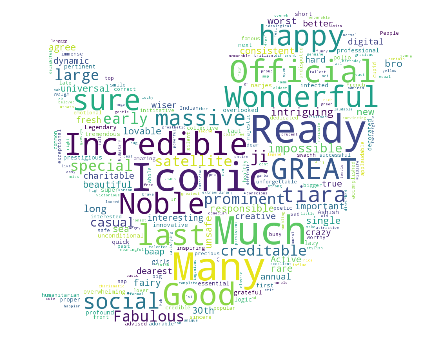

In [52]:
word_cloud_show(positive_words, twitter, 'positive')


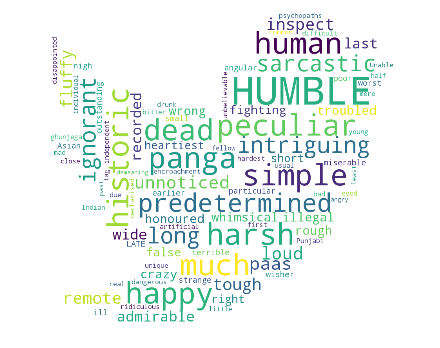

In [53]:
word_cloud_show(negative_words, twitter, 'negative')


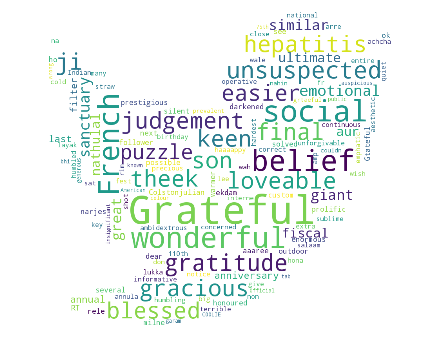

In [54]:
word_cloud_show(neutral_words, twitter, 'neutral')